# Basic plotting

In [ ]:
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

from growth_curve_calculator import parse_spectramax_xml

### Sample absorption measurement heatmap

In [2]:
# Parse an XML file
example_data_directory = Path("../../growth_curve_calculator/tests/example_data")
xml_filepath = example_data_directory / "sample_endpoints_3.xml"
microplate_data_list = parse_spectramax_xml(xml_filepath)
plate_data = microplate_data_list[0]

# Transform OD measurements into a format supported by seaborn heatmap
measurements = plate_data.measurements.pivot(
    index="well_row",
    columns="well_column",
    values="value",
)
measurements

well_column,1,2,3,4
well_row,,,,
A,0.112,0.445,0.122,0.112
B,0.107,0.641,0.157,0.167
C,0.092,0.343,0.138,0.118
D,0.123,0.440,0.153,0.117


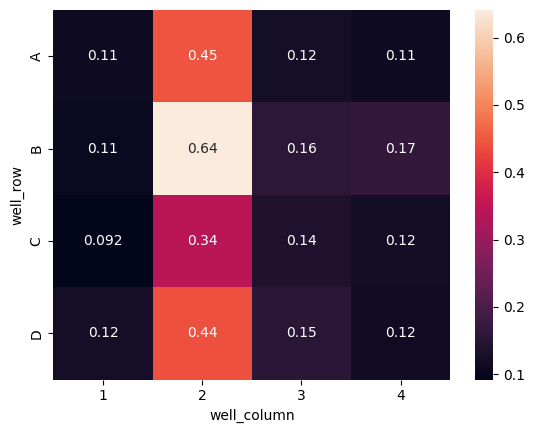

In [3]:
_ = sns.heatmap(measurements, annot=True)

### Sample spectral scan

In [6]:
# Parse an XML file
xml_filepath = example_data_directory / "sample_spectrum_scans.xml"
microplate_data_list = parse_spectramax_xml(xml_filepath)
plate_data = microplate_data_list[9]
plate_data.measurements.head()

,well_row,well_column,well_id,value,excitation_nm,emission_nm
0,A,1,A01,4416022.0,350.0,570.0
1,A,2,A02,4134762.0,350.0,570.0
2,A,3,A03,4024690.0,350.0,570.0
3,A,4,A04,6265246.0,350.0,570.0
4,A,5,A05,4405988.0,350.0,570.0


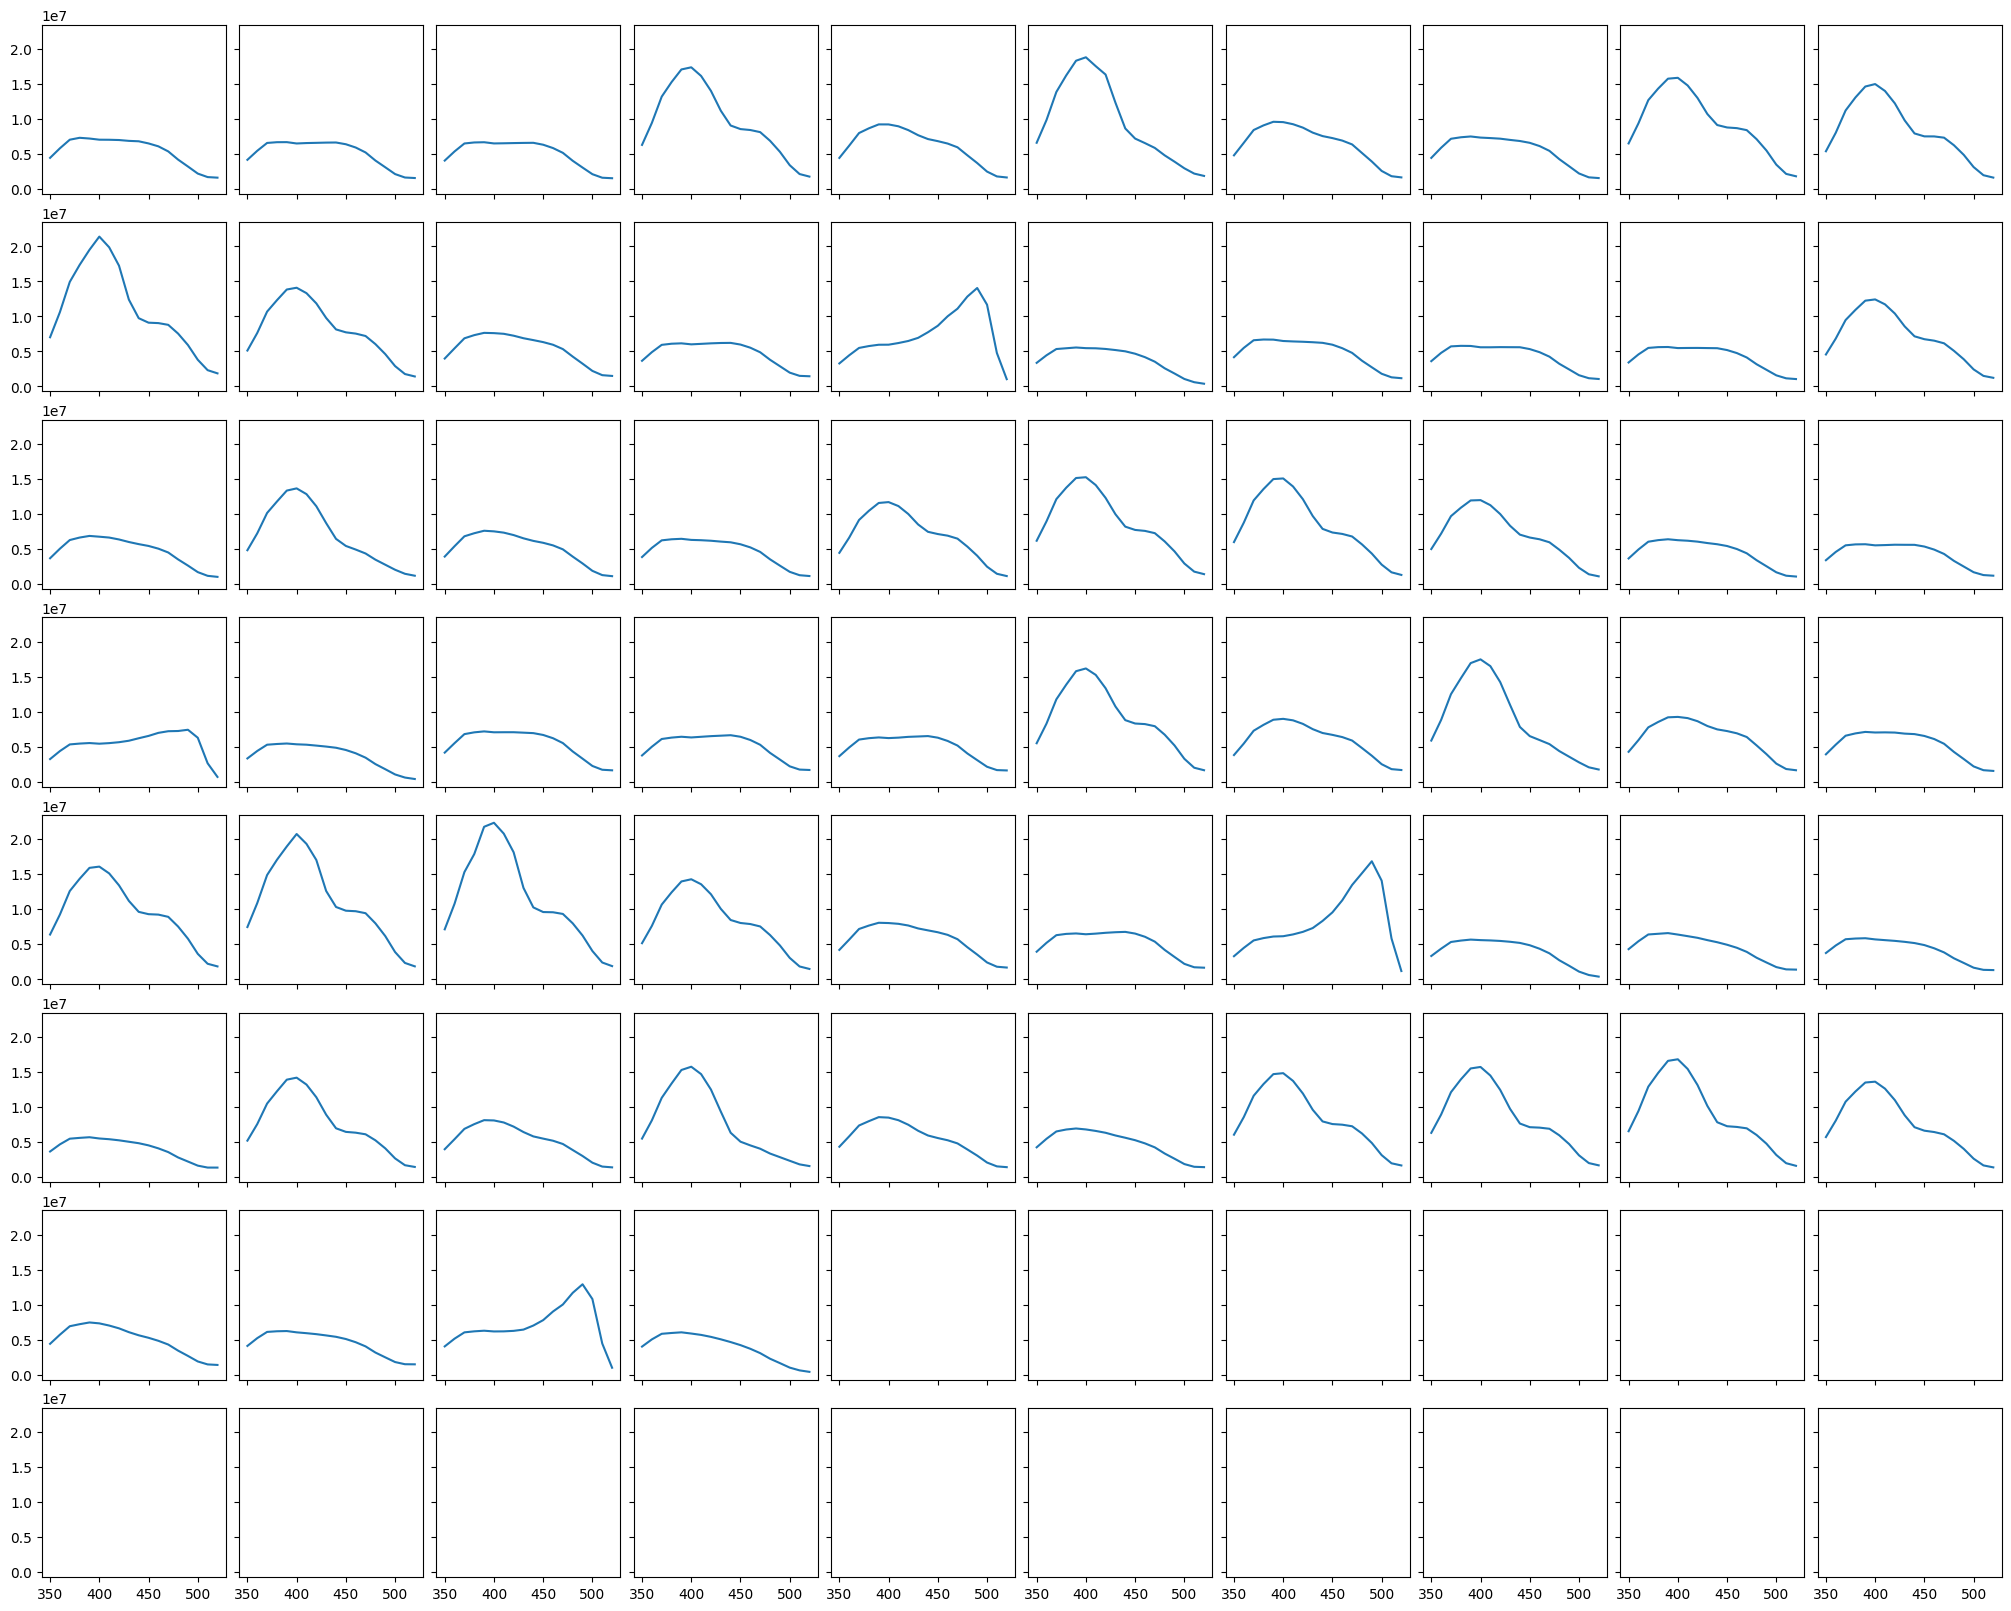

In [7]:
num_rows = plate_data.measurements["well_row"].nunique()
num_cols = plate_data.measurements["well_column"].nunique()
fig, axes = plt.subplots(
    nrows=num_rows,
    ncols=num_cols,
    layout="constrained",
    sharex=True,
    sharey=True,
    figsize=(2 * num_cols, 2 * num_rows)
)
well_ids = plate_data.measurements["well_id"].unique().tolist() # type: ignore
axes_map = {well_id: ax for well_id, ax in zip(well_ids, axes.flat)}

for well_id, group in plate_data.measurements.groupby("well_id"): # type: ignore
    ax = axes_map[well_id]
    x = group["excitation_nm"]
    y = group["value"]
    ax.plot(x, y)